<a href="https://colab.research.google.com/github/muhammadibrohimov-ai/Classification/blob/main/Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Bemorga dori tavsiya qilish tizimi

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [24]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv"
df = pd.read_csv(url)
df.sample(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
148,61,F,LOW,NORMAL,7.340,drugX
87,69,M,LOW,HIGH,15.478,drugY
15,16,F,HIGH,NORMAL,15.516,drugY
105,37,M,LOW,NORMAL,8.968,drugX
93,42,F,LOW,NORMAL,29.271,drugY
16,69,M,LOW,NORMAL,11.455,drugX
172,39,F,NORMAL,NORMAL,17.225,drugY
36,32,M,HIGH,NORMAL,9.445,drugA
133,24,M,NORMAL,HIGH,25.786,drugY
151,68,M,HIGH,HIGH,11.009,drugB


In [25]:
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'].values)
df['BP'] = encoder.fit_transform(df['BP'].values)
df['Cholesterol'] = encoder.fit_transform(df['Cholesterol'].values)
df.sample(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
134,42,0,0,0,21.036,drugY
106,22,1,2,0,11.953,drugX
90,62,1,2,0,16.594,drugY
154,37,1,1,1,16.724,drugY
156,31,1,0,1,11.227,drugA
63,45,1,1,1,8.370,drugX
60,38,0,1,1,29.875,drugY
77,26,0,0,1,19.161,drugY
18,23,1,1,0,7.298,drugC
123,36,0,2,0,16.753,drugY


In [26]:
X = df[["Age", "Sex", "BP", "Cholesterol", "Na_to_K"]].values
X[0:5]

array([[23.   ,  0.   ,  0.   ,  0.   , 25.355],
       [47.   ,  1.   ,  1.   ,  0.   , 13.093],
       [47.   ,  1.   ,  1.   ,  0.   , 10.114],
       [28.   ,  0.   ,  2.   ,  0.   ,  7.798],
       [61.   ,  0.   ,  1.   ,  0.   , 18.043]])

In [27]:
y = df['Drug'].values

### Train test split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=20)

### Model

In [29]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

### Baholash

In [30]:
y_predict = tree_model.predict(X_test)

In [31]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         4
       drugC       0.75      1.00      0.86         9
       drugX       1.00      0.81      0.89        21
       drugY       0.97      1.00      0.99        39

    accuracy                           0.95        80
   macro avg       0.94      0.96      0.95        80
weighted avg       0.96      0.95      0.95        80



In [35]:
print(f"tree_model accuracy : {sklearn.metrics.accuracy_score(y_test, y_predict)}")

tree_model accuracy : 0.95


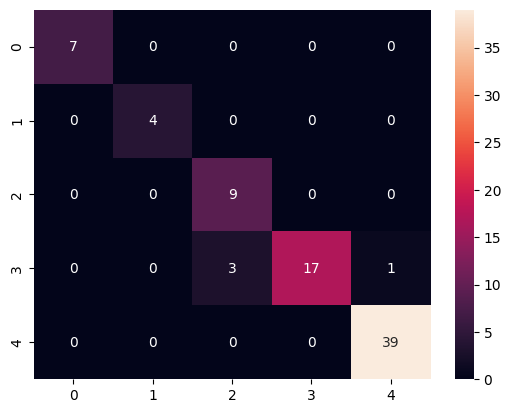

In [36]:
sns.heatmap(confusion_matrix(y_test, y_predict), annot = True)
plt.show()

In [38]:
predict = cross_val_predict(estimator = tree_model, X = X, y = y, cv = 5)
print(classification_report(y, predict))

              precision    recall  f1-score   support

       drugA       0.92      1.00      0.96        23
       drugB       1.00      0.88      0.93        16
       drugC       1.00      1.00      1.00        16
       drugX       1.00      0.98      0.99        54
       drugY       0.99      1.00      0.99        91

    accuracy                           0.98       200
   macro avg       0.98      0.97      0.98       200
weighted avg       0.99      0.98      0.98       200



#Decision Tree. Grafik

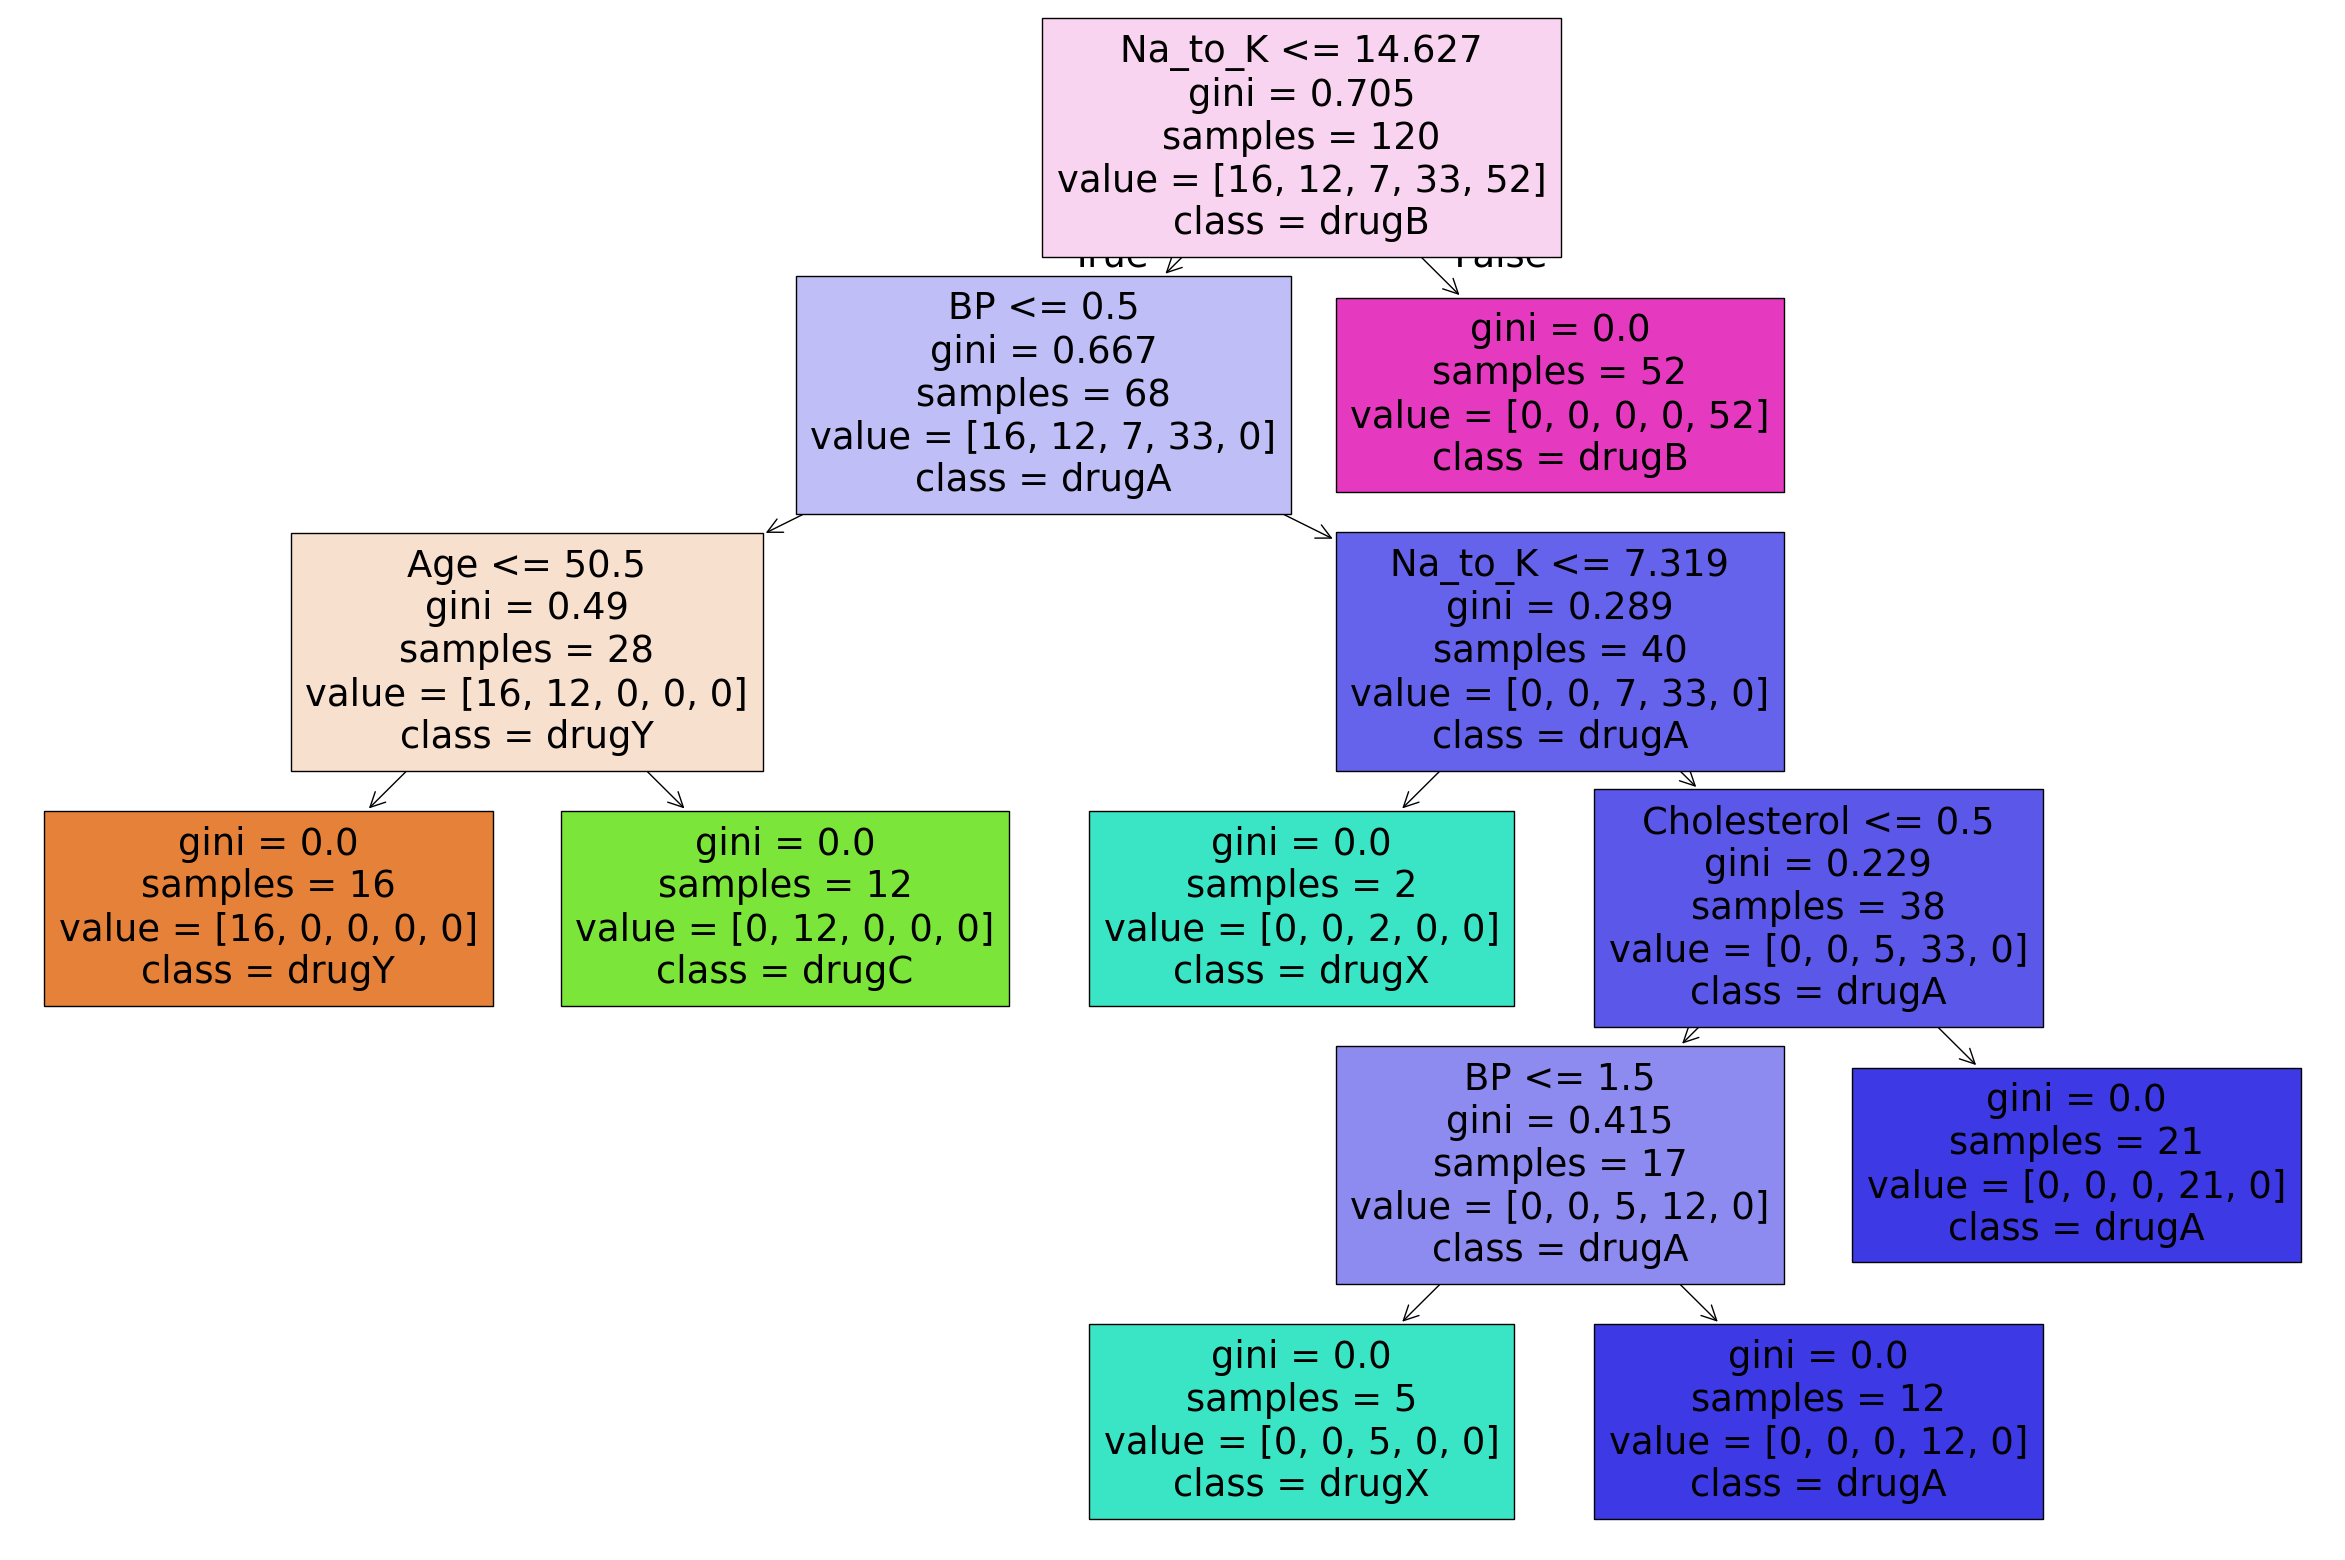

In [43]:
cols = df.drop('Drug', axis=1).columns
classes = df['Drug'].unique()

print(f"tree_model accuracy : {sklearn.metrics.accuracy_score(y_test, y_predict)}")

plt.figure(figsize=(30, 20))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

# Hyperparameters

#### **min_impurity_decrease** - natija qanchalik toza

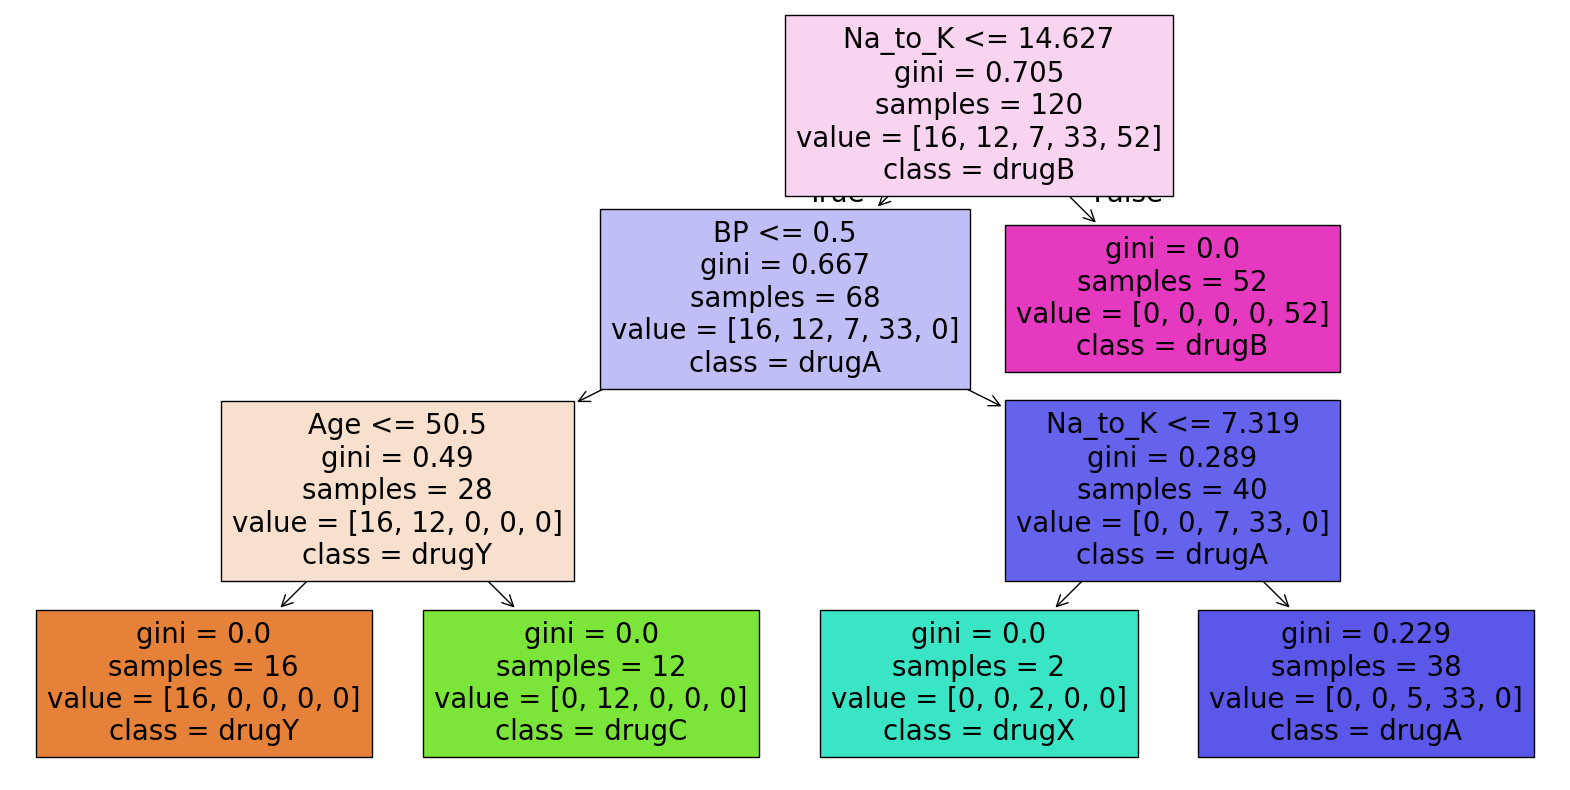

In [46]:
tree_model = DecisionTreeClassifier(min_impurity_decrease=0.02) # gini
tree_model.fit(X_train, y_train)

cols = df.drop('Drug', axis=1).columns
classes = df['Drug'].unique()

print(f"tree_model accuracy : {sklearn.metrics.accuracy_score(y_test, y_predict)}")

plt.figure(figsize=(20, 10))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

#### **max_depth** - shajara shoxlari soni

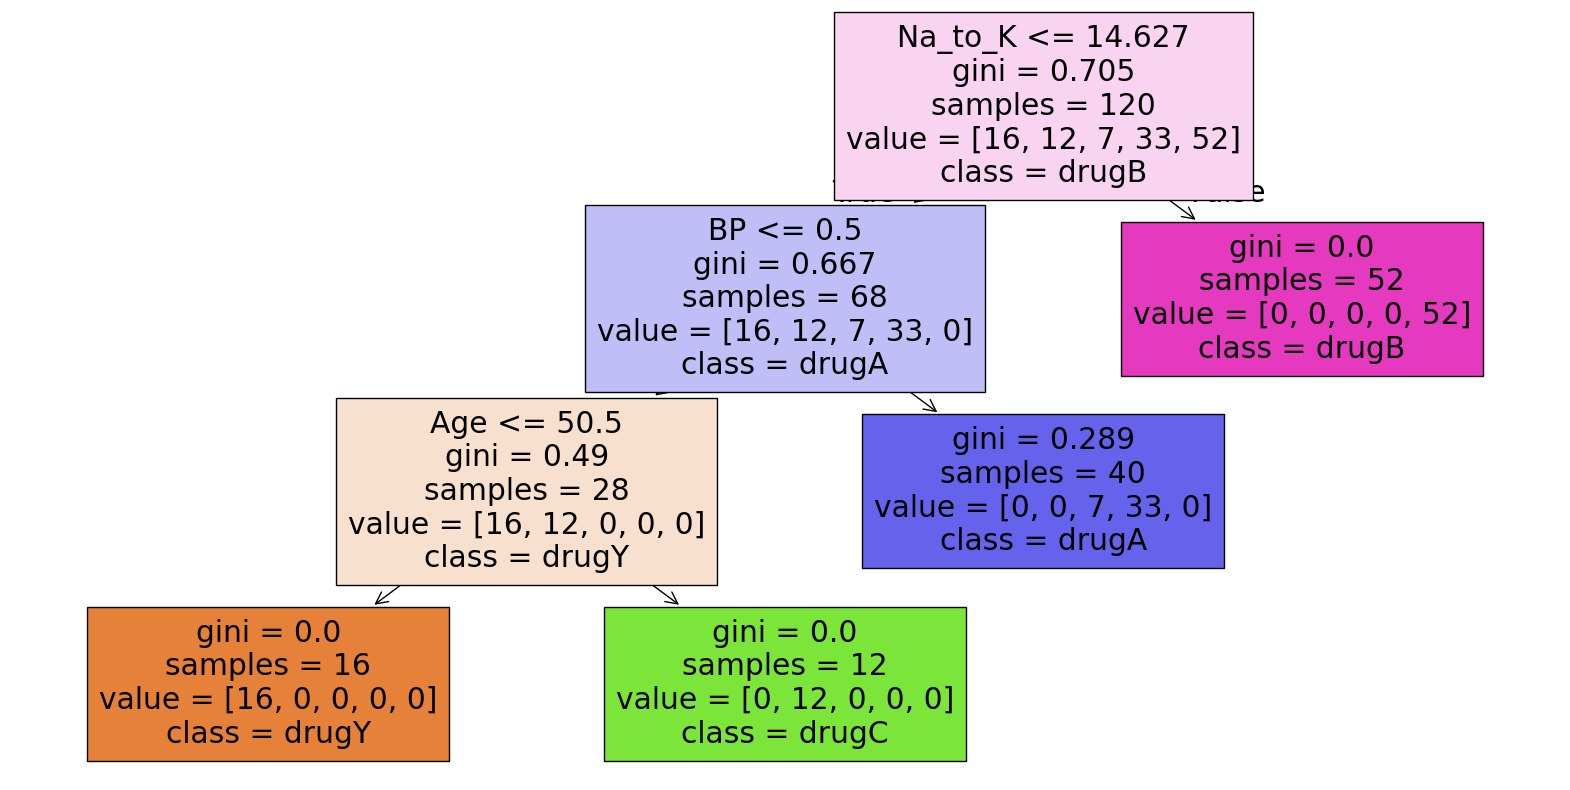

In [49]:
tree_model = DecisionTreeClassifier(min_impurity_decrease=0.1, max_depth=4) # gini
tree_model.fit(X_train, y_train)

cols = df.drop('Drug', axis=1).columns
classes = df['Drug'].unique()

print(f"tree_model accuracy : {sklearn.metrics.accuracy_score(y_test, y_predict)}")

plt.figure(figsize=(20, 10))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

#### **max_leaf_nodes** - tugunlar (sample)

tree_model accuracy : 0.95


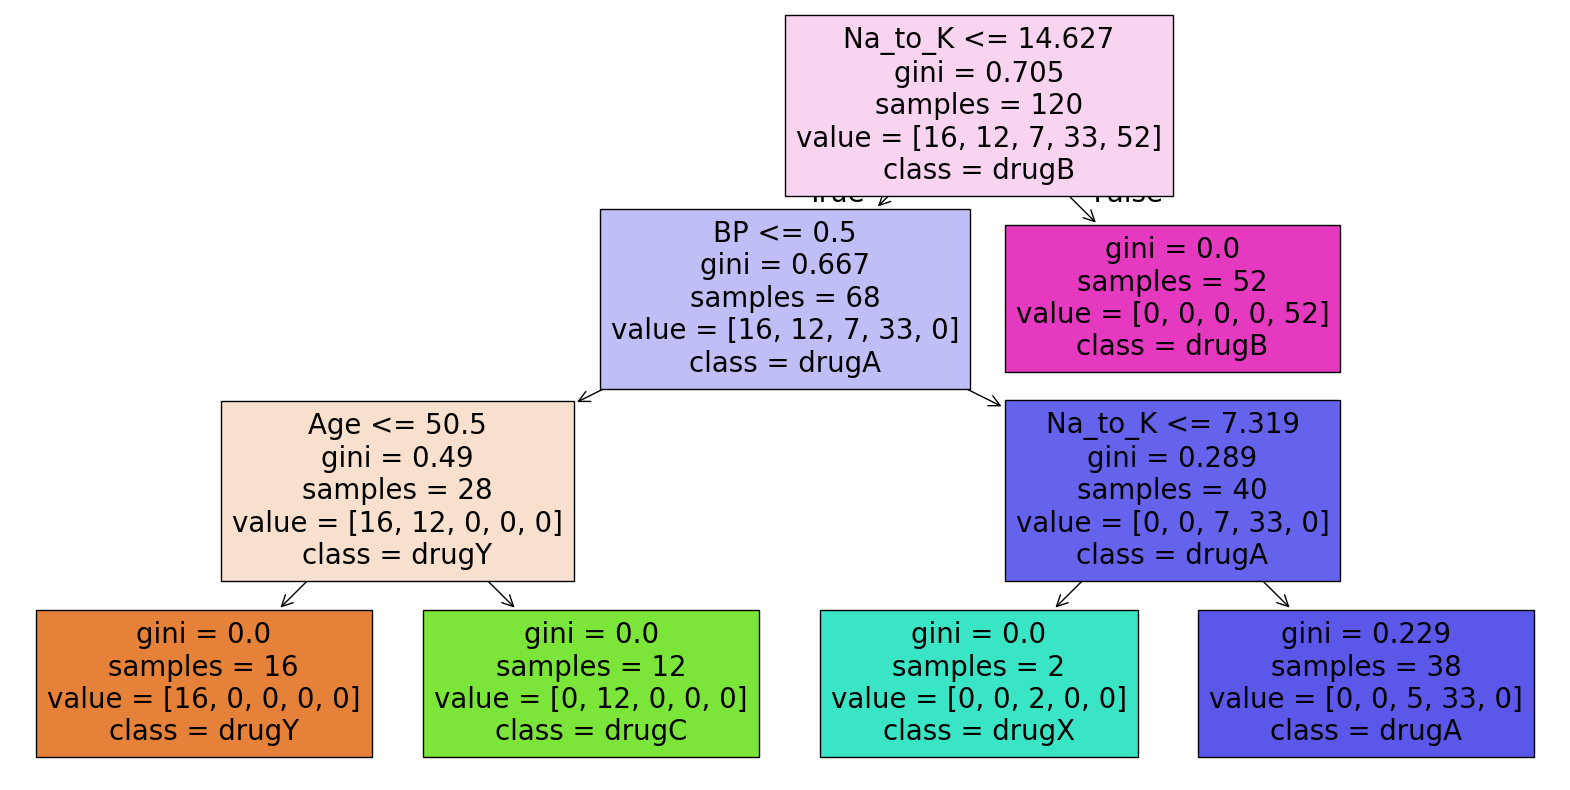

In [52]:
tree_model = DecisionTreeClassifier(max_leaf_nodes=5) # tugunlar sample
tree_model.fit(X_train, y_train)

cols = df.drop('Drug', axis=1).columns
classes = df['Drug'].unique()

print(f"tree_model accuracy : {sklearn.metrics.accuracy_score(y_test, y_predict)}")

plt.figure(figsize=(20, 10))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

# Random Forest

In [57]:
rf_model = RandomForestClassifier(n_estimators=20)
rf_model.fit(X_train, y_train)

y_predict = rf_model.predict(X_test)
print(classification_report(y_test, y_predict))

print(f'Random Forest accuracy_score : {sklearn.metrics.accuracy_score(y_test, y_predict)}')

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         4
       drugC       1.00      0.89      0.94         9
       drugX       0.95      0.95      0.95        21
       drugY       0.97      1.00      0.99        39

    accuracy                           0.97        80
   macro avg       0.99      0.97      0.98        80
weighted avg       0.98      0.97      0.97        80

Random Forest accuracy_score : 0.975
